### Real Estate Price Regression

In [1]:
#import libraries
import pandas as pd 
import numpy as np

In [2]:
# red data from csv
data = pd.read_csv('Realestate.csv')

In [3]:
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# total rows and columns
data.shape

(414, 8)

In [5]:
# show all columns names
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
# rename columns
data.columns = ['No',"Transaction","HouseAge","DistancetoMRT","#conveniencestore","#latitude","#longitude","PriceUnitArea"]

In [7]:
data

,No,Transaction,HouseAge,DistancetoMRT,#conveniencestore,#latitude,#longitude,PriceUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 414 non-null    int64  
 1   Transaction        414 non-null    float64
 2   HouseAge           414 non-null    float64
 3   DistancetoMRT      414 non-null    float64
 4   #conveniencestore  414 non-null    int64  
 5   #latitude          414 non-null    float64
 6   #longitude         414 non-null    float64
 7   PriceUnitArea      414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
data.describe()

,No,Transaction,HouseAge,DistancetoMRT,#conveniencestore,#latitude,#longitude,PriceUnitArea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
# house with highest  unit area price
data['PriceUnitArea'].idxmax()

270

In [11]:
# lets see house number 270
data.iloc[270]

No                    271.00000
Transaction          2013.33300
HouseAge               10.80000
DistancetoMRT         252.58220
#conveniencestore       1.00000
#latitude              24.97460
#longitude            121.53046
PriceUnitArea         117.50000
Name: 270, dtype: float64

In [12]:
# house with smallest unit area price 
data['PriceUnitArea'].idxmin()

113

In [13]:
# lets see house number 113
data.iloc[113]

No                    114.00000
Transaction          2013.33300
HouseAge               14.80000
DistancetoMRT         393.26060
#conveniencestore       6.00000
#latitude              24.96172
#longitude            121.53812
PriceUnitArea           7.60000
Name: 113, dtype: float64

In [14]:
print(f"The No of the house with the biggest unit area price is {data.iloc[270][0]}.")

The No of the house with the biggest unit area price is 271.0.


In [15]:
print(f"The No of the house with the smallest unit area price is {data.iloc[113][0]}.")

The No of the house with the smallest unit area price is 114.0.


In [16]:
# convert flot into int
hightestunitpriceno =int(data.iloc[270][0])
lowestunitpriceno =int(data.iloc[113][0])

In [17]:
print(f"The No of the house with the highest unit area price is {hightestunitpriceno}.")

The No of the house with the highest unit area price is 271.


In [18]:
print(f"The No of the house with the smallest unit area price is {lowestunitpriceno}.")

The No of the house with the smallest unit area price is 114.


In [19]:
data.columns

Index(['No', 'Transaction', 'HouseAge', 'DistancetoMRT', '#conveniencestore',
       '#latitude', '#longitude', 'PriceUnitArea'],
      dtype='object')

In [20]:
#drop columns
data.drop(['No','Transaction'], axis=1,inplace=True)

In [21]:
data

,HouseAge,DistancetoMRT,#conveniencestore,#latitude,#longitude,PriceUnitArea
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [22]:
# checking null values
data.isna().sum()

HouseAge             0
DistancetoMRT        0
#conveniencestore    0
#latitude            0
#longitude           0
PriceUnitArea        0
dtype: int64

In [23]:
# check duplicated Values
data.duplicated().sum()

0

In [25]:
# check corr btw Price unit Area 
data.corr()['PriceUnitArea'].sort_values(ascending=True)

DistancetoMRT       -0.673613
HouseAge            -0.210567
#longitude           0.523287
#latitude            0.546307
#conveniencestore    0.571005
PriceUnitArea        1.000000
Name: PriceUnitArea, dtype: float64

In [26]:
# seaborn
import seaborn as sns 
import matplotlib.pylab as plt 

<AxesSubplot:>

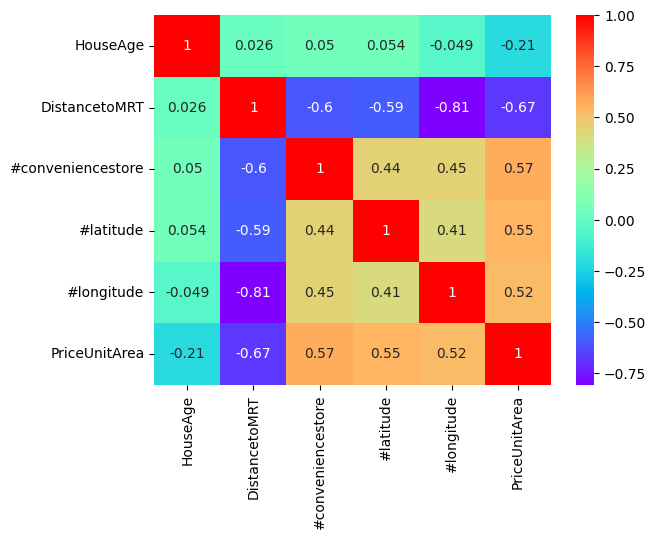

In [28]:
sns.heatmap(data.corr(),annot = True, cmap='rainbow')

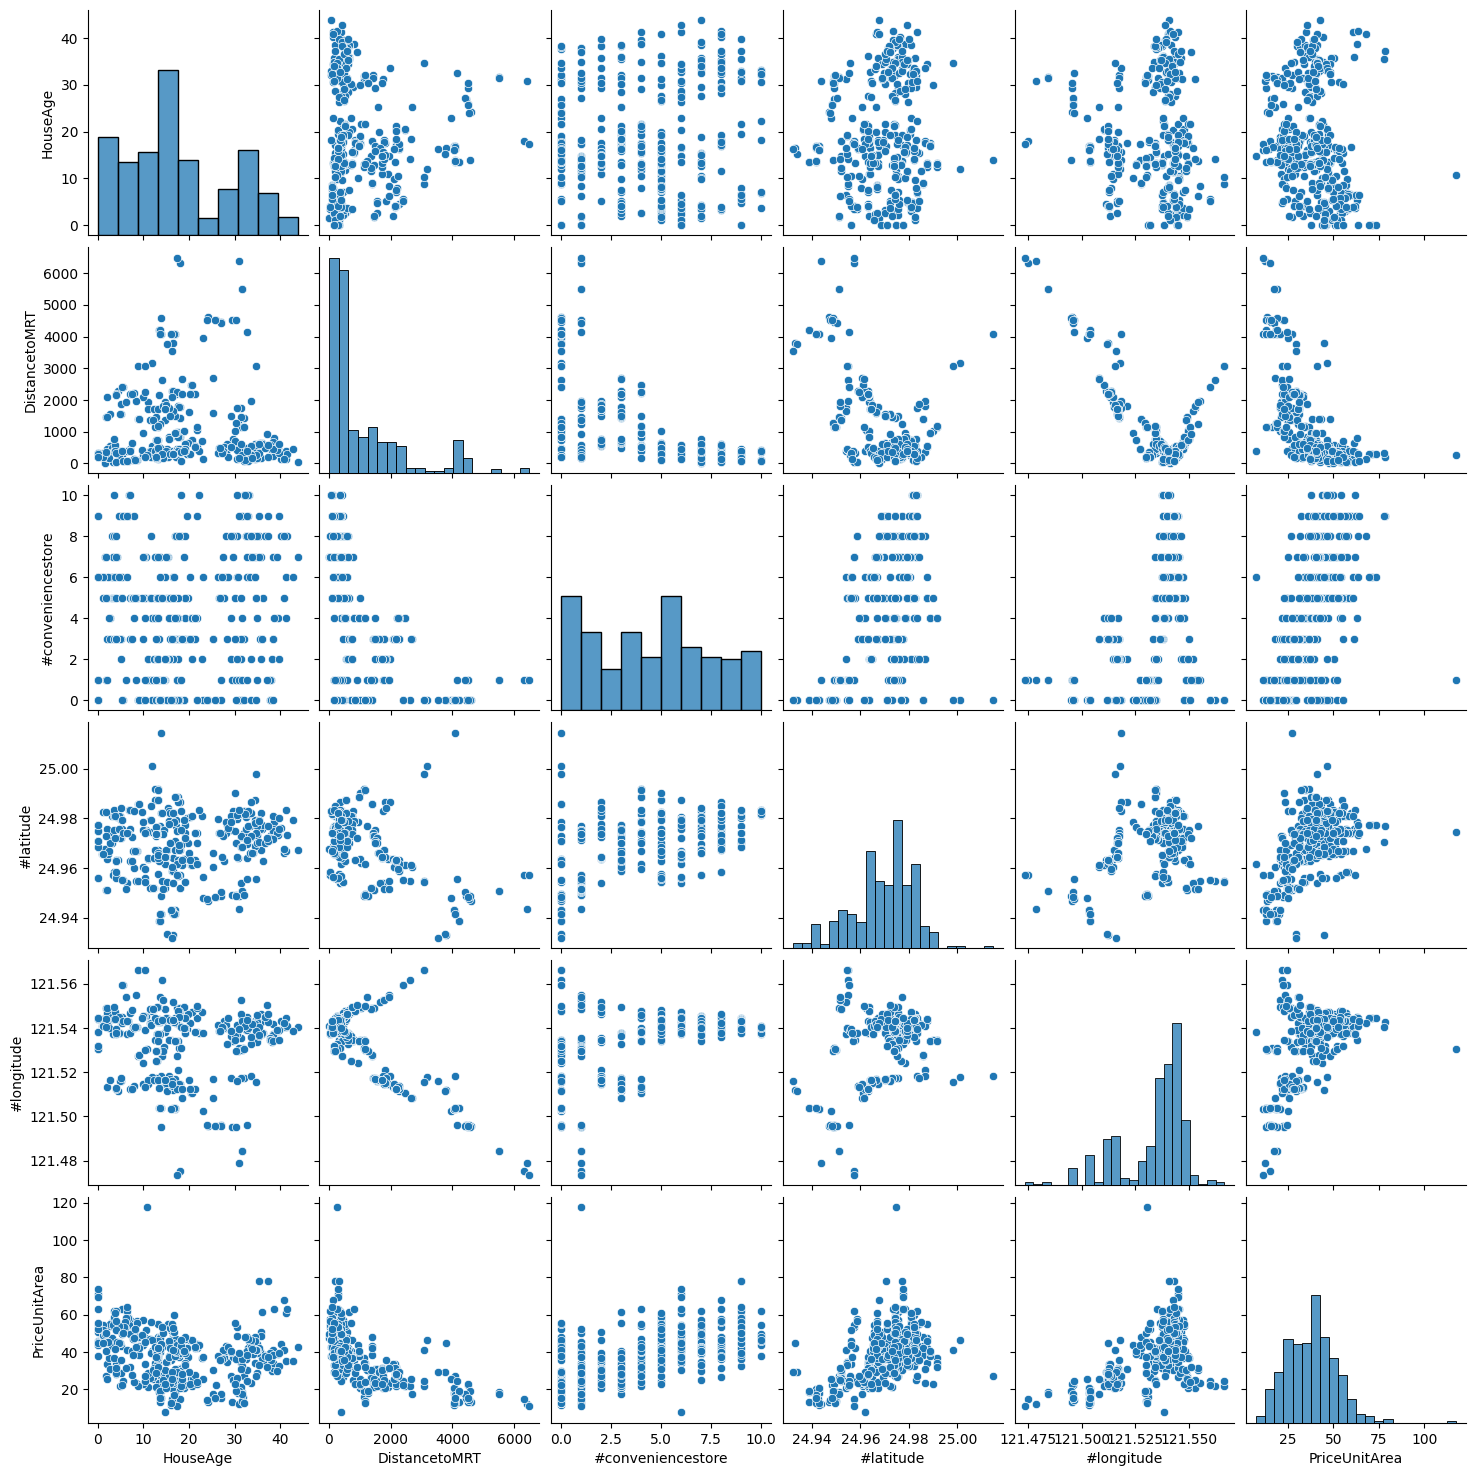

In [29]:
sns.pairplot(data)

In [32]:
colorsforx =['red','Green','Black','Purple','Yellow']

colorchager =0

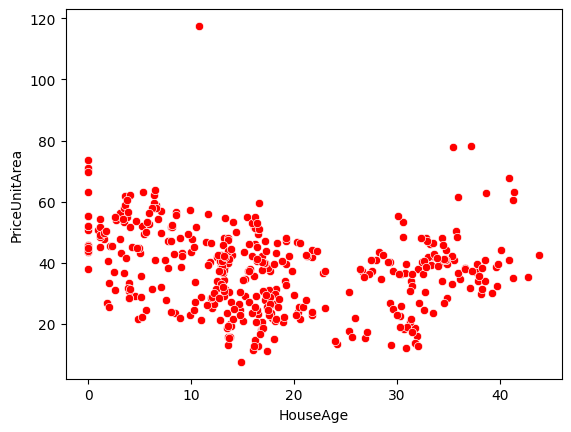

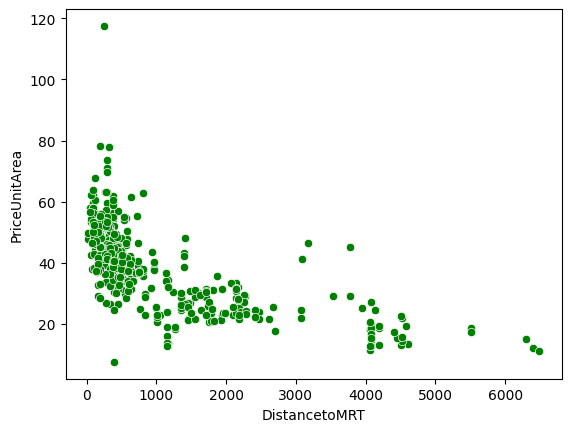

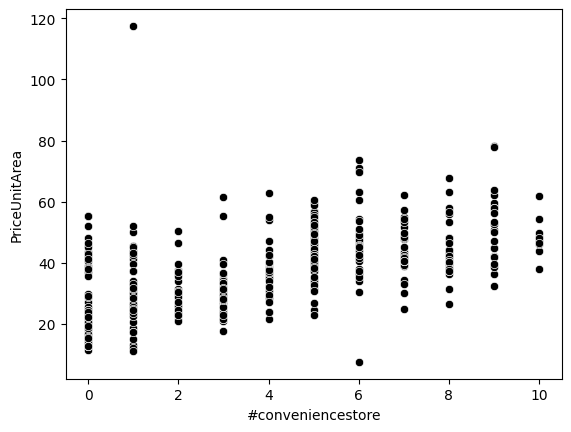

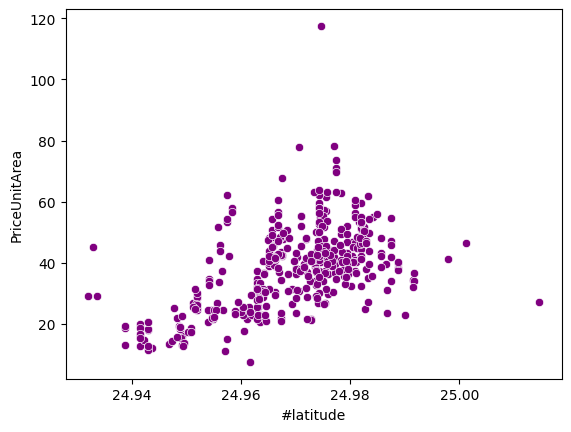

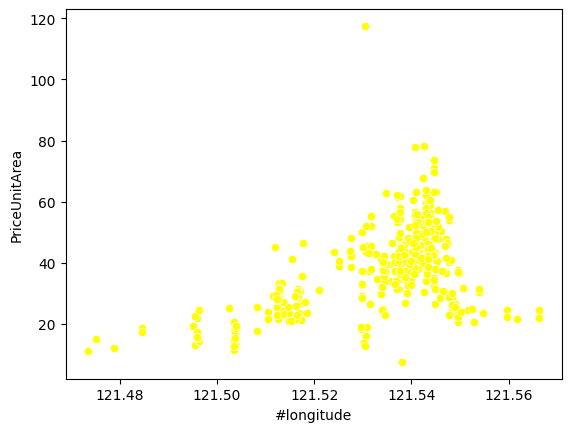

In [34]:
# draw graphs for complete dataset
for i in data.columns[:-1]:
    sns.scatterplot(data=data, x=i, y='PriceUnitArea',color=colorsforx[colorchager])
    plt.show()
    colorchager += 1

### Feature Engineering

In [35]:
data.columns

Index(['HouseAge', 'DistancetoMRT', '#conveniencestore', '#latitude',
       '#longitude', 'PriceUnitArea'],
      dtype='object')

In [38]:
X =data[['HouseAge','DistancetoMRT','#conveniencestore','#latitude','#longitude']]
y =data['PriceUnitArea']

In [39]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [41]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


### Machine Learning models

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [46]:
# prediction function
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Mean squared erroron model is {}".format(mean_squared_error(y_test,predictions)))

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(scaled_X_train,y_train)
predsLr= lr.predict(scaled_X_test)

In [48]:
# predict model
modelresults(predsLr)

Mean absolute error on model is 6.522788784670582
Mean squared erroron model is 73.30654624670811


### SVR

In [49]:
from sklearn.svm import SVR 
from sklearn.model_selection import    GridSearchCV

In [51]:
svrmodel=SVR()
param_gridsvr ={'C':[0.001,0.01,0.1,1],"kernel":['linear','rbf','poly'],'gamma':["scale",'auto'],
                "degree":[2,3,4,5]}
gridsvr =GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
print("Best parameters from model is {}".format(gridsvr.best_params_))

Best parameters from model is {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [54]:
predsgridsvr = gridsvr.predict(scaled_X_test)

In [55]:

# predict model
modelresults(predsgridsvr)

Mean absolute error on model is 6.16754946665212
Mean squared erroron model is 70.13077028721321


###      Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
para_gridrfr = {'bootstrap':[True],"max_depth":[5,10,15],"max_features":
                ['auto','log2'],"n_estimators":[2,3,4,5,6,7,8,9,10,11,12]}


In [61]:
gridrfr =GridSearchCV(rfrmodel,para_gridrfr)
gridrfr.fit(scaled_X_train,y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [62]:
print("Best Parameters for mode is {}".format(gridrfr.best_params_))

Best Parameters for mode is {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 10}


In [63]:
predsgridrfr = gridrfr.predict(scaled_X_test)

In [64]:
# model results
modelresults(predsgridrfr)

Mean absolute error on model is 6.073781619047619
Mean squared erroron model is 65.28602656813409


In [65]:
X

,HouseAge,DistancetoMRT,#conveniencestore,#latitude,#longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [ ]:
# get mean for X values

In [66]:
columnumber =1
for i in X.columns:
    mean =data[i].mean()
    print("The mean of the column {} is  {}".format(columnumber,mean))
    columnumber +=1
    

The mean of the column 1 is  17.71256038647343
The mean of the column 2 is  1083.8856889130436
The mean of the column 3 is  4.094202898550725
The mean of the column 4 is  24.969030072463767
The mean of the column 5 is  121.53336108695655


In [67]:
newhouse = np.array([17,1083,4,24,121])

In [68]:
gridrfr.predict(newhouse.reshape(1,-1))

array([27.66])